## Regluarization comparison for multilayer perceptron networks, F/data2_30min
This notebooks looks to examplify how various levels of regularization can affect the results of a multiplayer perceptron model, using the simulated data set F/data2_30min. The layer sizes and hyperparameters are predefined to a set of values aiming to give a credible results without the need for any extensive grid search.

In [1]:
# %load example_F_regularization_comparison.py
from api import Api
mlApi = Api()

Using TensorFlow backend.


## Features and targets
Model B, with the exception of the inlet pressure sensor on the cooling side (which can be considered constant), is chosen for this exemplification. The following features and targets are used:

Features: Process T in, Process T out, Process Flow, Cooling T in, Cooling valve opening

Targets: Cooling T out

In [2]:
# define dataset specifics
filename = "../master-thesis-db/datasets/F/data2_30min.csv"

columns = [
	['FYN0111', 'Gasseksport rate', 'MSm^3/d'],
	['FT0111', 'Gasseksport molvekt','g/mole'],
	['TT0102_MA_Y', 'Varm side A temperatur inn', 'degrees'],
	['TIC0101_CA_YX', 'Varm side A temperatur ut', 'degrees'],
	['TT0104_MA_Y', 'Varm side B temperatur inn', 'degrees'],
	['TIC0103_CA_YX', 'Varm side B temperatur ut', 'degrees'],
	['TT0106_MA_Y', 'Varm side C temperatur inn', 'degrees'],
	['TIC0105_CA_YX', 'Varm side C temperatur ut', 'degrees'],
	['TI0115_MA_Y', 'Scrubber temperatur ut', 'degrees'],
	['PDT0108_MA_Y', 'Varm side A trykkfall', 'Bar'],
	['PDT0119_MA_Y', 'Varm side B trykkfall', 'Bar'],
	['PDT0118_MA_Y', 'Varm side C trykkfall', 'Bar'],
	['PIC0104_CA_YX', 'Innløpsseparator trykk', 'Barg'],
	['TIC0425_CA_YX', 'Kald side temperatur inn', 'degrees'],
	['TT0651_MA_Y', 'Kald side A temperatur ut', 'degrees'],
	['TT0652_MA_Y', 'Kald side B temperatur ut', 'degrees'],
	['TT0653_MA_Y', 'Kald side C temperatur ut', 'degrees'],
	['TIC0101_CA_Y', 'Kald side A ventilåpning', '%'],
	['TIC0103_CA_Y', 'Kald side B ventilåpning', '%'],
	['TIC0105_CA_Y', 'Kald side C ventilåpning', '%'],
]

irrelevantColumns = [
		'FT0111',
		'PDT0108_MA_Y',
		'PDT0119_MA_Y',
		'PDT0118_MA_Y',
		'TT0104_MA_Y',
		'TIC0103_CA_YX',
		'TI0115_MA_Y',
		'TT0652_MA_Y',
		'TIC0103_CA_Y',
		'PIC0104_CA_YX',
		'TIC0101_CA_Y',
		'TT0102_MA_Y',
		'TIC0101_CA_YX',
		'TT0651_MA_Y',
]

targetColumns = [
	'TT0653_MA_Y',
]

traintime = [
        ["2018-01-01 00:00:00", "2018-08-01 00:00:00"],
    ]

testtime = [
    "2018-01-01 00:00:00",
    "2019-05-01 00:00:00"
]

## Models
Hidden layer sizes of 1x64 and 2x64 neurons are chosen as they are assumed complex enough to discover possible nonlinearities while still avoiding overfitting due to model complexity. A number of epochs ensuring model convergence is chosen, together with EarlyStopping and ModelCheckpoint callbacks that ensure the best set of weights are stored for predictive use.

Seven different rates of both Lasso and Ridge regularization are added, in addition to a linear model and a model using dropout.

In [3]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

mlpr1 = mlApi.MLP('MLPr 1x 64 1.0', layers=[64], l1_rate=1.0, l2_rate=1.0, epochs=5000)
mlpr2 = mlApi.MLP('MLPr 1x 64 0.5', layers=[64], l1_rate=0.5, l2_rate=0.5, epochs=5000)
mlpr3 = mlApi.MLP('MLPr 1x 64 0.1', layers=[64], l1_rate=0.1, l2_rate=0.1, epochs=5000)
mlpr4 = mlApi.MLP('MLPr 1x 64 0.05', layers=[64], l1_rate=0.05, l2_rate=0.05, epochs=5000)
mlpr5 = mlApi.MLP('MLPr 1x 64 0.01', layers=[64], l1_rate=0.01, l2_rate=0.01, epochs=5000)
mlpr6 = mlApi.MLP('MLPr 1x 64 0.005', layers=[64], l1_rate=0.005, l2_rate=0.005, epochs=5000)
mlpr7 = mlApi.MLP('MLPr 1x 64 0.001', layers=[64], l1_rate=0.001, l2_rate=0.001, epochs=5000)
mlpd = mlApi.MLP('MLPd 1x 64', layers=[64], dropout=0.2, epochs=5000)

mlpr11 = mlApi.MLP('MLPr 2x 64 1.0', layers=[64, 64], l1_rate=1.0, l2_rate=1.0, epochs=5000)
mlpr22 = mlApi.MLP('MLPr 2x 64 0.5', layers=[64, 64], l1_rate=0.5, l2_rate=0.5, epochs=5000)
mlpr33 = mlApi.MLP('MLPr 2x 64 0.1', layers=[64, 64], l1_rate=0.1, l2_rate=0.1, epochs=5000)
mlpr44 = mlApi.MLP('MLPr 2x 64 0.05', layers=[64, 64], l1_rate=0.05, l2_rate=0.05, epochs=5000)
mlpr55 = mlApi.MLP('MLPr 2x 64 0.01', layers=[64, 64], l1_rate=0.01, l2_rate=0.01, epochs=5000)
mlpr66 = mlApi.MLP('MLPr 2x 64 0.005', layers=[64, 64], l1_rate=0.005, l2_rate=0.005, epochs=5000)
mlpr77 = mlApi.MLP('MLPr 2x 64 0.001', layers=[64, 64], l1_rate=0.001, l2_rate=0.001, epochs=5000)
mlpdd = mlApi.MLP('MLPd 2x 64', layers=[64, 64], dropout=0.2, epochs=5000)

linear_r = mlApi.Linear_Regularized('linear')

Columns before removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0102_MA_Y - Varm side A temperatur inn
Col. 2 : TIC0101_CA_YX - Varm side A temperatur ut
Col. 3 : TT0104_MA_Y - Varm side B temperatur inn
Col. 4 : TIC0103_CA_YX - Varm side B temperatur ut
Col. 5 : TT0106_MA_Y - Varm side C temperatur inn
Col. 6 : TIC0105_CA_YX - Varm side C temperatur ut
Col. 7 : PDT0108_MA_Y - Varm side A trykkfall
Col. 8 : PDT0119_MA_Y - Varm side B trykkfall
Col. 9 : PDT0118_MA_Y - Varm side C trykkfall
Col. 10 : PIC0104_CA_YX - Innløpsseparator trykk
Col. 11 : TIC0425_CA_YX - Kald side temperatur inn
Col. 12 : TT0651_MA_Y - Kald side A temperatur ut
Col. 13 : TT0652_MA_Y - Kald side B temperatur ut
Col. 14 : TT0653_MA_Y - Kald side C temperatur ut
Col. 15 : TIC0101_CA_Y - Kald side A ventilåpning
Col. 16 : TIC0103_CA_Y - Kald side B ventilåpning
Col. 17 : TIC0105_CA_Y - Kald side C ventilåpning

Columns after removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0106_MA_Y - Varm side C te

Model MLPr 1x 64 1.0 was loaded from file
Model MLPr 1x 64 0.5 was loaded from file
Model MLPr 1x 64 0.1 was loaded from file
Model MLPr 1x 64 0.05 was loaded from file
Model MLPr 1x 64 0.01 was loaded from file
Model MLPr 1x 64 0.005 was loaded from file
Model MLPr 1x 64 0.001 was loaded from file
Model MLPd 1x 64 was loaded from file
Training model linear
+------------------+-----------+-------------+---------------+--------+
|      Model       | Min. loss | Chosen loss | Min. val loss | Epochs |
+------------------+-----------+-------------+---------------+--------+
|  MLPr 1x 64 1.0  |  1.186183 |   1.18632   |    0.262027   |  2287  |
|  MLPr 1x 64 0.5  |  1.186175 |   1.18629   |    0.262221   |  2038  |
|  MLPr 1x 64 0.1  |  1.186178 |   1.186338  |    0.262438   |  1945  |
| MLPr 1x 64 0.05  |  0.579482 |   0.94774   |    0.22415    |  1205  |
| MLPr 1x 64 0.01  |  0.263584 |   0.286293  |    0.283579   |  3868  |
| MLPr 1x 64 0.005 |  0.195644 |   0.21286   |    0.329454   |  

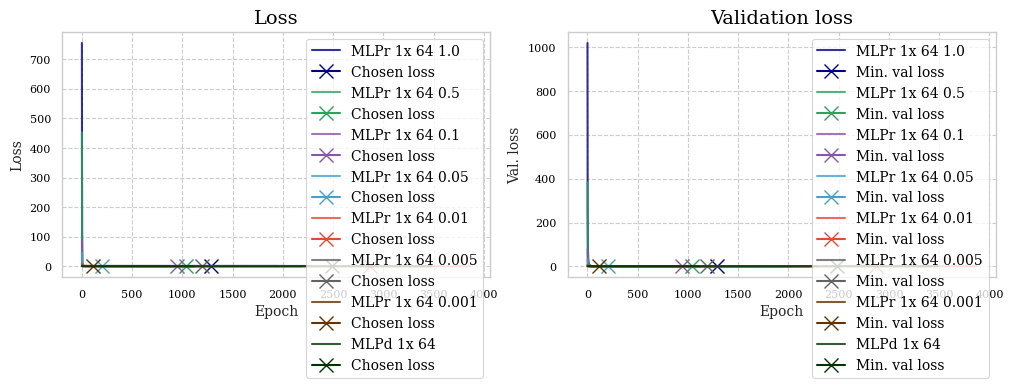

Model prediction scores
+------------------+-------------+------------+
|      Model       | Train score | Test score |
+------------------+-------------+------------+
|  MLPr 1x 64 1.0  |   -0.0013   |  -0.2044   |
|  MLPr 1x 64 0.5  |   -0.0013   |   -0.204   |
|  MLPr 1x 64 0.1  |   -0.0014   |  -0.2035   |
| MLPr 1x 64 0.05  |    0.3733   |  -0.1229   |
| MLPr 1x 64 0.01  |    0.7878   |  -1.1102   |
| MLPr 1x 64 0.005 |    0.8033   |  -0.2737   |
| MLPr 1x 64 0.001 |    0.821    |  -0.9928   |
|    MLPd 1x 64    |    0.8328   |  -0.7014   |
|      linear      |    0.6158   |   0.5949   |
+------------------+-------------+------------+


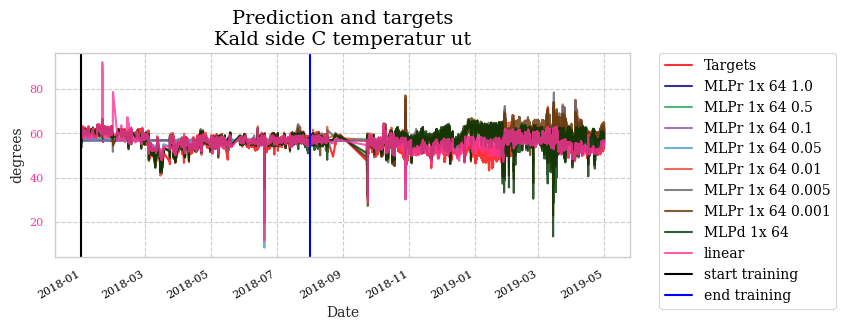

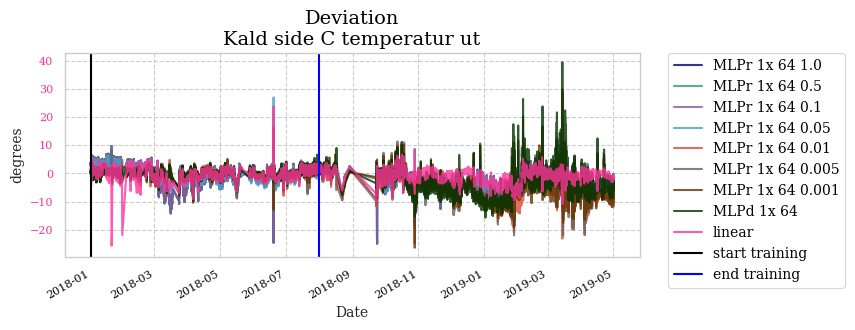

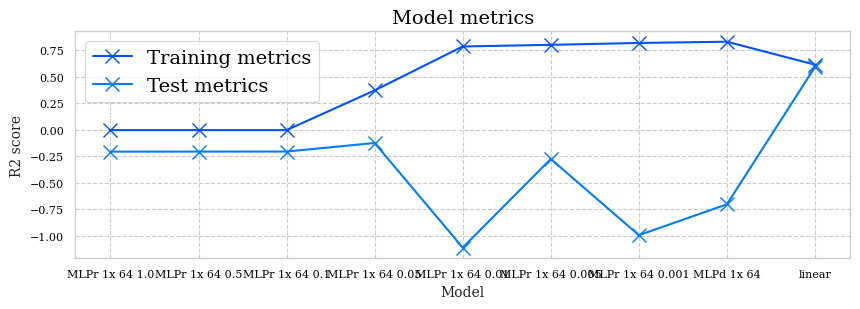

In [4]:
modelList = [
    mlpr1,
    mlpr2,
    mlpr3,
    mlpr4,
    mlpr5,
    mlpr6,
    mlpr7,
	mlpd,
	linear_r,
]

mlApi.initModels(modelList)
retrain=False
mlApi.trainModels(retrain)
modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
	plot=True,
	interpol=False,
)

## Model evluation 1
From the above model metrics, we see that model 1-3 with regularization ranging from 1.0 to 0.1 have converged to the dataset mean. This is indicated by the R2 score of 0. In short, this means the degree of regularization has been too high for the network to train appropriate weights, because any change in weights will result in a larger loss increase by penalizing the weights than loss decrease by fitting the model. Additionally, the following model with a regluarization level of 0.05 has converged to a state for which some areas of prediction show flat lines. This incidates a combination of input values that the models are not able to identify any degree of variation between, which is highly unlikely for any data sample of varying decimal values. This model can therefore be assumed to have converged to non-generalizing set of weights despite its relatively low loss values.

Note that the linear model has performed very poorly towards the start of the training period, even though the predictions made during the testing period appear resonable. There is reason to believe this model is very sensitive to some feature(s).

Model MLPr 1x 64 0.01 was loaded from file
Model MLPr 1x 64 0.005 was loaded from file
Model MLPd 1x 64 was loaded from file
+------------------+-----------+-------------+---------------+--------+
|      Model       | Min. loss | Chosen loss | Min. val loss | Epochs |
+------------------+-----------+-------------+---------------+--------+
| MLPr 1x 64 0.01  |  0.263584 |   0.286293  |    0.283579   |  3868  |
| MLPr 1x 64 0.005 |  0.195644 |   0.21286   |    0.329454   |  2192  |
|    MLPd 1x 64    |  0.166214 |   0.182143  |    0.256439   |  3486  |
+------------------+-----------+-------------+---------------+--------+


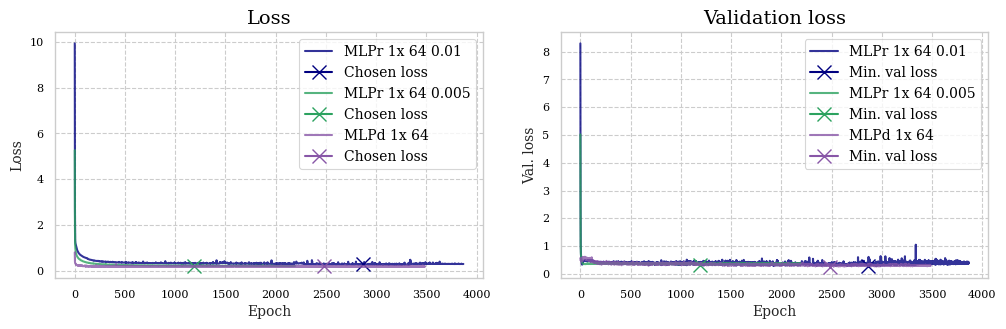

Model prediction scores
+------------------+-------------+------------+
|      Model       | Train score | Test score |
+------------------+-------------+------------+
| MLPr 1x 64 0.01  |    0.7878   |  -1.1102   |
| MLPr 1x 64 0.005 |    0.8033   |  -0.2737   |
|    MLPd 1x 64    |    0.8328   |  -0.7014   |
+------------------+-------------+------------+


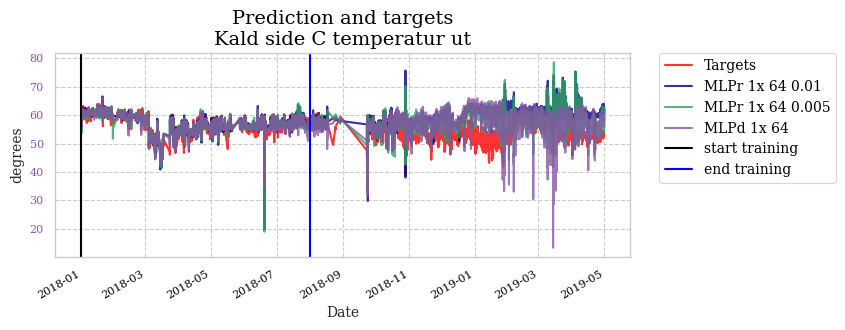

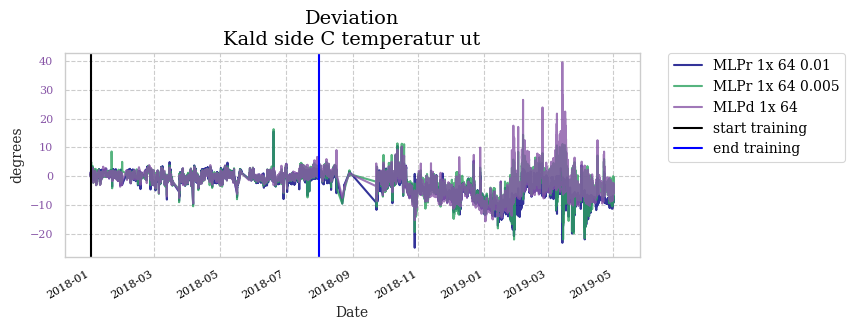

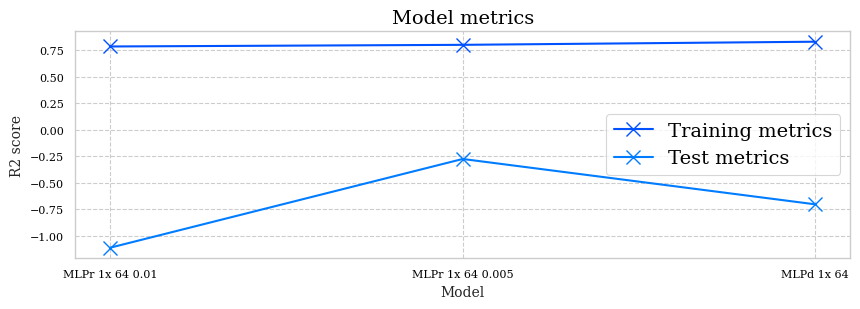

In [5]:
modelList = [
    mlpr5,
    mlpr6,
	mlpd,
]

mlApi.initModels(modelList)
retrain=False
mlApi.trainModels(retrain)
modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
	plot=True,
	interpol=False,
)

## Model evaluation 2
With the previously discussed models removed, we can easier graph the remaining models. The model using dropout scores best on the loss and R2 score metrics, however we can clearly see that the model predicts very varying values with deviation as high as 40 degrees throughout the end of the testing period. The model does not seem to have converged to a satisfying set of weights.

Although perhaps difficult to see, the MLP models have converged to more beliable curves despite worse metrics than the dropout model. We can see a clear degree in the deviation plot between 2018-11 and 2019-02, before the value resets to zero following a change of the exchange in use and builds up slowly once more. Some more troublesome results are shown towards the very end, with splikes of deviation as high as 20 degrees.

Model MLPr 2x 64 1.0 was loaded from file
Model MLPr 2x 64 0.5 was loaded from file
Model MLPr 2x 64 0.1 was loaded from file
Model MLPr 2x 64 0.05 was loaded from file
Model MLPr 2x 64 0.01 was loaded from file
Model MLPr 2x 64 0.005 was loaded from file
Model MLPr 2x 64 0.001 was loaded from file
Model MLPd 2x 64 was loaded from file
Training model linear
+------------------+-----------+-------------+---------------+--------+
|      Model       | Min. loss | Chosen loss | Min. val loss | Epochs |
+------------------+-----------+-------------+---------------+--------+
|  MLPr 2x 64 1.0  |  1.185846 |   1.187623  |    0.239627   |  1249  |
|  MLPr 2x 64 0.5  |  1.185798 |   1.186873  |    0.241003   |  1094  |
|  MLPr 2x 64 0.1  |  0.287894 |   0.337134  |    0.291957   |  1231  |
| MLPr 2x 64 0.05  |  0.247356 |   0.297745  |    0.347785   |  1187  |
| MLPr 2x 64 0.01  |  0.145898 |   0.261316  |    0.424178   |  1030  |
| MLPr 2x 64 0.005 |  0.132279 |   0.228103  |    0.362133   |  

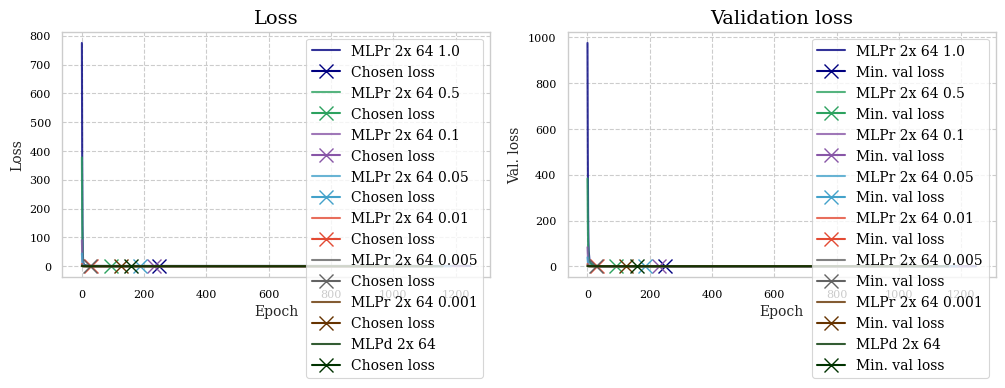

Model prediction scores
+------------------+-------------+------------+
|      Model       | Train score | Test score |
+------------------+-------------+------------+
|  MLPr 2x 64 1.0  |   -0.0008   |  -0.2621   |
|  MLPr 2x 64 0.5  |   -0.0007   |  -0.2594   |
|  MLPr 2x 64 0.1  |    0.7329   |   0.3855   |
| MLPr 2x 64 0.05  |    0.7335   |   0.2942   |
| MLPr 2x 64 0.01  |    0.7934   |   0.474    |
| MLPr 2x 64 0.005 |    0.8115   |   0.4888   |
| MLPr 2x 64 0.001 |    0.8683   |  -1.5693   |
|    MLPd 2x 64    |    0.8448   |   0.5776   |
|      linear      |    0.6158   |   0.5949   |
+------------------+-------------+------------+


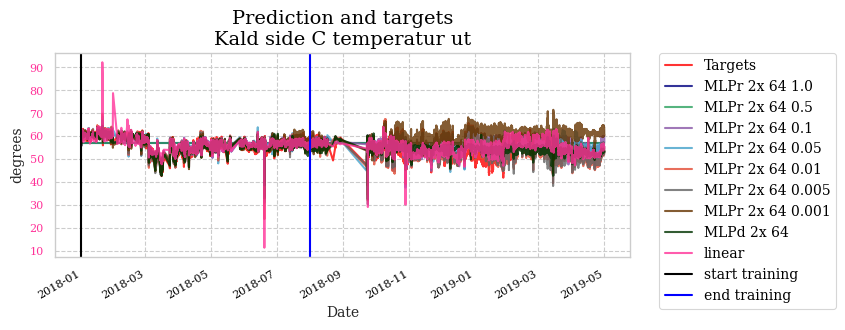

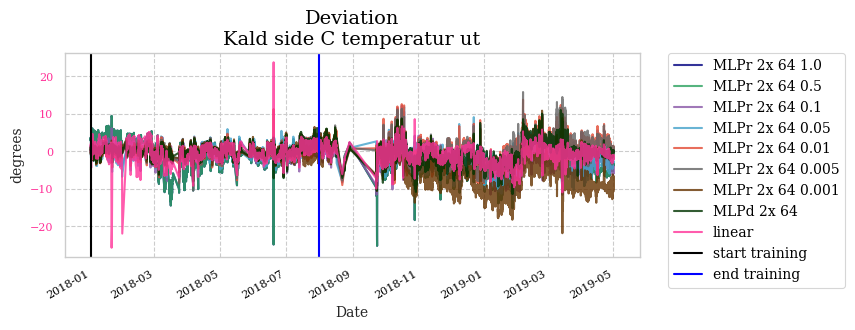

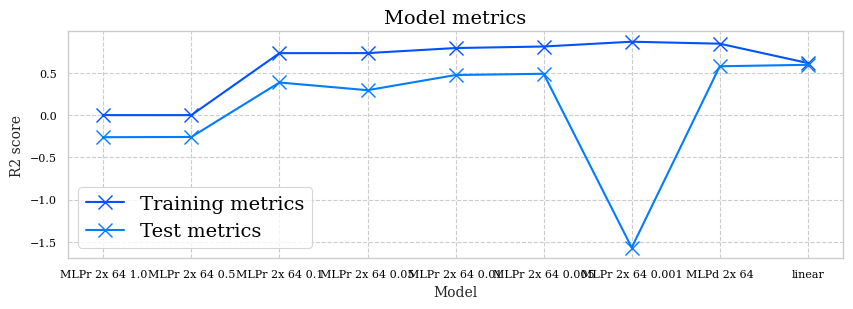

In [6]:
modelList = [
    mlpr11,
    mlpr22,
    mlpr33,
    mlpr44,
    mlpr55,
    mlpr66,
    mlpr77,
	mlpdd,
	linear_r,
]

mlApi.initModels(modelList)
retrain=False
mlApi.trainModels(retrain)
modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
	plot=True,
	interpol=False,
)

## Model evaluation 3
Again, several models have converged to the data set means, while the model with the least amount of regluarization seems to have overfitted and thus predict largely unreasonable values. The linear model is as before.

Model MLPr 2x 64 0.01 was loaded from file
Model MLPr 2x 64 0.005 was loaded from file
Model MLPd 2x 64 was loaded from file
+------------------+-----------+-------------+---------------+--------+
|      Model       | Min. loss | Chosen loss | Min. val loss | Epochs |
+------------------+-----------+-------------+---------------+--------+
| MLPr 2x 64 0.01  |  0.145898 |   0.261316  |    0.424178   |  1030  |
| MLPr 2x 64 0.005 |  0.132279 |   0.228103  |    0.362133   |  1028  |
|    MLPd 2x 64    |  0.097383 |   0.116735  |    0.378355   |  1159  |
+------------------+-----------+-------------+---------------+--------+


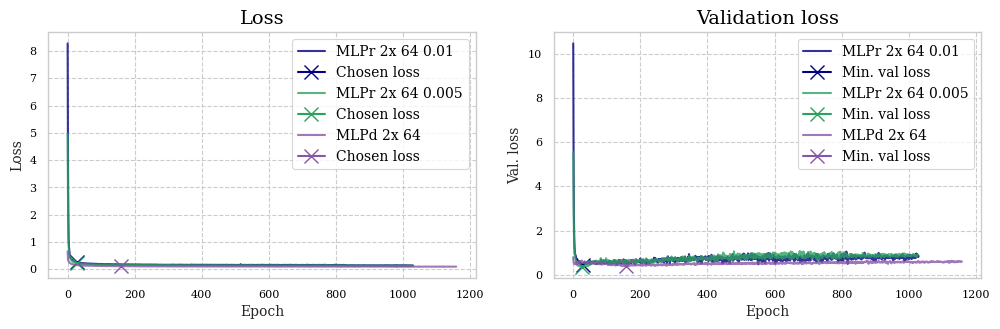

Model prediction scores
+------------------+-------------+------------+
|      Model       | Train score | Test score |
+------------------+-------------+------------+
| MLPr 2x 64 0.01  |    0.7934   |   0.474    |
| MLPr 2x 64 0.005 |    0.8115   |   0.4888   |
|    MLPd 2x 64    |    0.8448   |   0.5776   |
+------------------+-------------+------------+


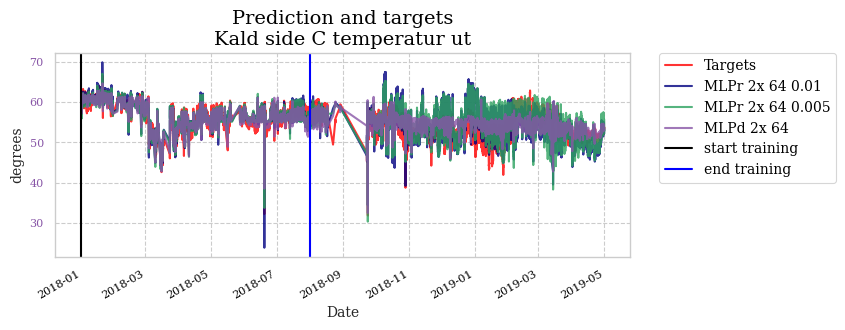

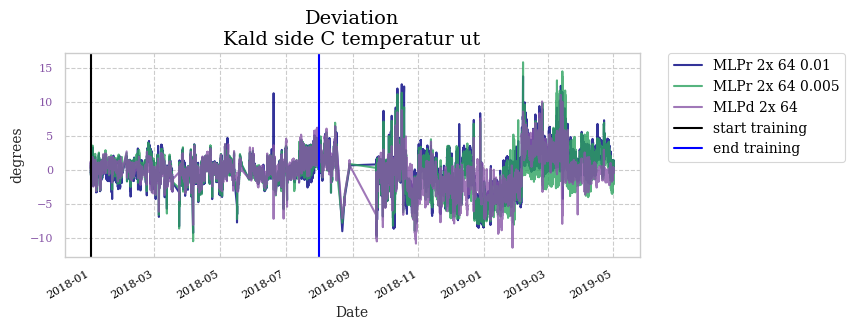

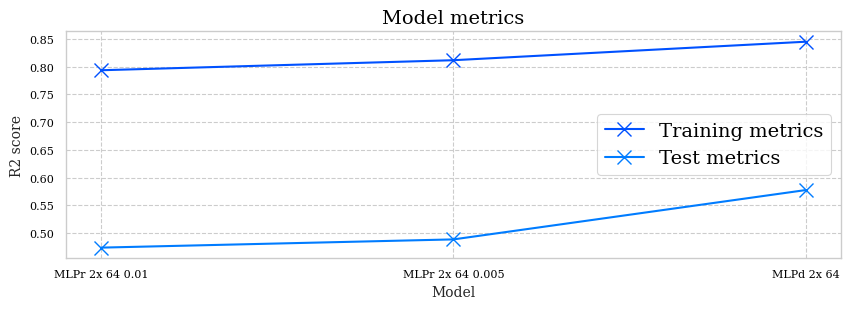

In [7]:
modelList = [
    mlpr55,
    mlpr66,
	mlpdd,
]

mlApi.initModels(modelList)
retrain=False
mlApi.trainModels(retrain)
modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
	plot=True,
	interpol=False,
)

## Model evaluation 4
This time, the model using dropout once more performs best when considering the metrics. However, this time it seems to also have generalized well to the testing data set. Less variation is seen for this model than the remaining regluarization models. A gradual increase from 2018-11 to 2019-02 is seen before a reset to zero deviation following the cleaning. Once more, a gradual build up can be seen following this.

It's worth noting that the predictions of the dropout model are very consistent throughout the testing period, with a mean around 55 degrees. The lack of variation is almost alarming, although not entirely unreasonable considering the processing plant has reached maximum flow capasity around this time and maintains rather consistent input parameters with regards to flow and process side temperature during this time.

## Conclusion
As for the simulation dataset, the calculations performed here suggest complex models may be of interest with regards to fouling indication. The use of dropout and two (or more) hidden layers are advised for further research